# Dimensionality Reduction with PCA

Make a copy of [this Google Doc to note your answers](https://docs.google.com/a/wellesley.edu/document/d/1yShTnBSjlYWXESAD8a_s8JkUYKCjPlJZpjcGmHQT1eA/edit?usp=sharing) to the exercises, and share it with me.

This notebook requires `numpy` and `sklearn`. If you don't have one or the other,
join a team that does.

## 0. Demonstration with Toy Data

Let's start off with a simple 2-d example.

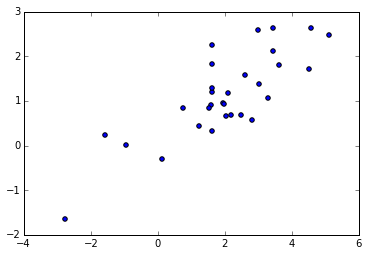

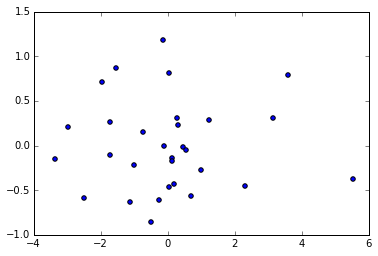

Principal Components (aka eigenvectors)
[-0.89724525 -0.44153252]
[-0.44153252  0.89724525]


In [2]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

toydata = np.array([[ 2.59580335,  1.58213829], [-2.78661934, -1.64798522],
       [ 1.63139824,  0.31923225], [ 3.30217587,  1.05792994],
       [ 3.45343699,  2.63857074], [ 4.51845728,  1.70482163],
       [ 1.62812508,  1.19761457], [ 4.56938036,  2.62619335],
       [ 2.49414924,  0.69266559], [ 0.76665816,  0.83840976],
       [ 2.99633637,  2.57876939], [ 1.23200454,  0.43656981],
       [-1.5765329 ,  0.24567484], [ 0.12613358, -0.30435084],
       [ 1.95787363,  0.9496059 ], [ 1.61221959,  2.25505992],
       [ 3.01332383,  1.38350552], [ 5.10364862,  2.48569172],
       [ 3.60794238,  1.79807615], [ 2.10190226,  1.1684013 ],
       [ 2.02245627,  0.65881093], [ 3.43442621,  2.12150639],  
        [ 1.59708639,  0.91357768],[ 2.82063906,  0.56994637],
       [ 1.97769457,  0.92055868], [ 1.53287808,  0.83695528],
       [-0.96349005,  0.00946347], [ 2.17383937,  0.69441521],
       [ 1.60326191,  1.82933177], [ 1.62176519,  1.28228541]])

# plot the original data
plt.scatter(toydata[:, 0], toydata[:, 1])
plt.show()

# project the data onto 2 dimensions using sklearn's PCA 
toydimreduce2 = PCA(n_components=2)
reducted_toydata = toydimreduce2.fit_transform(toydata-toydata.mean(axis=0))  
# plot this data
plt.scatter(reducted_toydata[:, 0], reducted_toydata[:, 1])
plt.show()

# display the eigenvectors
print 'Principal Components (aka eigenvectors)'
for c in toydimreduce2.components_:
    print c

**Exercise 0:** Convince yourself, by looking at the plot of the original data, that these eigenvectors are correct.

## 1. Visualization of Dimension-Reduced Digits

We project MNIST digits onto two dimensions using PCA and visualize the results.

In [3]:
import urllib2

def load(url):
    """read a CSV from the web, return data and labels"""
    response = urllib2.urlopen(url)
    Xy = np.loadtxt(response, delimiter=',')
    y = Xy[:, -1]
    X = Xy[:, :-1]
    return X, y

trainX, trainy = load('http://cs.wellesley.edu/~sravana/ml/ps1/data/mnist1100/training.txt')
print 'Loaded training data', trainX.shape

# center the data 
trainXmean = np.mean(trainX, axis=0)
trainX -= trainXmean

Loaded training data (10000, 784)


Projected data onto 2 dimensions


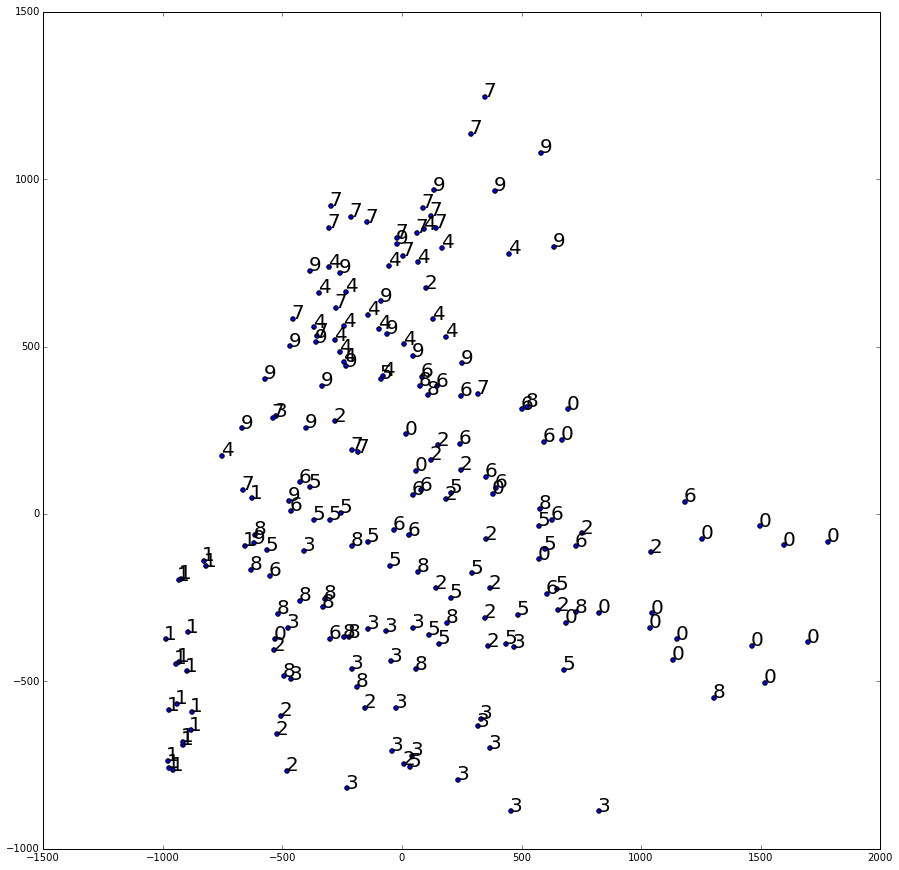

In [4]:
# run PCA
from sklearn.decomposition import PCA
dimreduce2 = PCA(n_components=2)
reducedTrainX2 = dimreduce2.fit_transform(trainX)  
# produces n by 2 matrix, where n = num of data points
print 'Projected data onto 2 dimensions'

# plot every 50th digit, just to reduce clutter
reducedTrainX2_sample = reducedTrainX2[0::50, :]
plt.figure(figsize=(15, 15))
plt.scatter(reducedTrainX2_sample[:, 0], reducedTrainX2_sample[:, 1])
for i in range(0, reducedTrainX2.shape[0], 50):  
    plt.annotate(str(int(trainy[i])), (reducedTrainX2[i, 0], reducedTrainX2[i, 1]), size=20)
plt.show()

**Exercise 1:** Looking at the visualization, think about classifying digits represented in this reduced 2-d space, using k Nearest Neighbors.

What are some digits that could be confused for one another? What are the digits that would be most easily classified?

## 2. Classification on the reduced space

How does a kNN classifier perform on the reduced representation?

First, let's get the results for the original space. 
We'll use a fixed `k=3` and `metric=euclidean` for simplicity.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from numpy.linalg import norm
import time

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix (adapted from sklearn's doc)
    """
    classes = range(cm.shape[0])
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

knnmodel = KNeighborsClassifier(n_neighbors=3)

testX, testy = load('http://cs.wellesley.edu/~sravana/ml/ps1/data/mnist1100/testing.txt')
print 'Loaded test data', testX.shape

# center the data using the training mean
testX -= trainXmean

Loaded test data (1000, 784)


Accuracy of kNN: 0.921
Confusion matrix:
Ran in 13.9735560417 seconds


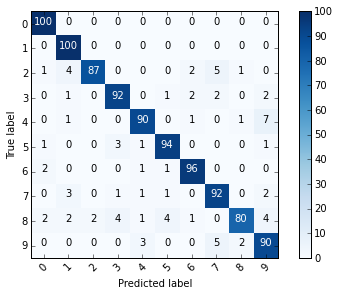

In [6]:
# baseline: kNN with no dimensionality reduction
start = time.time()  # to time the computation
knnmodel.fit(trainX, trainy)
predy = knnmodel.predict(testX)
print 'Accuracy of kNN:', 1-norm(predy-testy, 0)/float(testy.size)
print 'Confusion matrix:'
plot_confusion_matrix(confusion_matrix(testy, predy))
print 'Ran in', time.time()-start, 'seconds'

Same thing now with the dimension-reduced data.

Accuracy of kNN: 0.398
Confusion matrix:
Ran in 0.438883066177 seconds


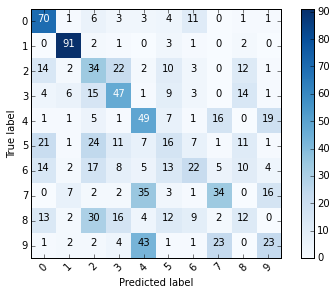

In [7]:
# project test data on new space
reducedTestX2 = dimreduce2.transform(testX)

# kNN with 2-d dimensionality reduction
start = time.time()
knnmodel.fit(reducedTrainX2, trainy)
predy = knnmodel.predict(reducedTestX2)
print 'Accuracy of kNN:', 1-norm(predy-testy, 0)/float(testy.size)
print 'Confusion matrix:'
plot_confusion_matrix(confusion_matrix(testy, predy))

print 'Ran in', time.time()-start, 'seconds'

**Exercise 2:** How does this result compare to your guesses in Exercise about the digits that would be confused and/or correctly classified?

Okay, so 2-d wasn't great, but we're likely throwing away too much information going from 784 dimensions to only 2.

2-d *is* nice for visualizations, though.

**Exercise 3:** Observe the speedup of kNN running time for reduced data compared to the original. What was the speedup that you expected from the theoretical complexity?

**Exercise 4**: In the cell below, try other numbers of dimensions to reduce the data to, and run the kNN classifier. Remember that you must estimate the principal components on the training data, and project the training as well as test data onto these, just like the code above. 

Can you beat the baseline?

Accuracy of kNN: 0.943
Confusion matrix:
Ran in 0.536775112152 seconds


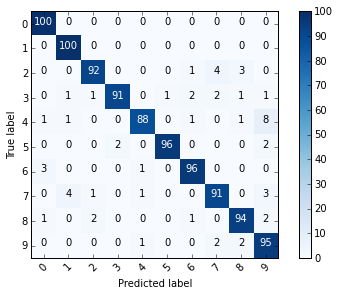

In [8]:
# write your code for PCA+kNN with other dimension values here
# project test data on new space
from sklearn.decomposition import PCA
dimreduce = PCA(n_components=32)
reducedTrainX = dimreduce.fit_transform(trainX) 

# project test data on new space
reducedTestX = dimreduce.transform(testX)

# kNN with 3-d dimensionality reduction
start = time.time()
knnmodel.fit(reducedTrainX, trainy)
predy = knnmodel.predict(reducedTestX)
print 'Accuracy of kNN:', 1-norm(predy-testy, 0)/float(testy.size)
print 'Confusion matrix:'
plot_confusion_matrix(confusion_matrix(testy, predy))

print 'Ran in', time.time()-start, 'seconds'

## 3. Eigendigits and Eigenfaces

The above computations projected the original data onto the principal component vectors. But what do these vectors (in the original space) look like? The sklearn `PCA` class has an attribute called `components_` which are the eigenvectors, and `explained_variance_` which are the corresponding eigenvalues. 

Since these eigenvectors are in the original 784-dim pixel space, we can just visualize them as images.

Let's compute the top 8 principal components and visualize them.

Visualizing the eigenvectors


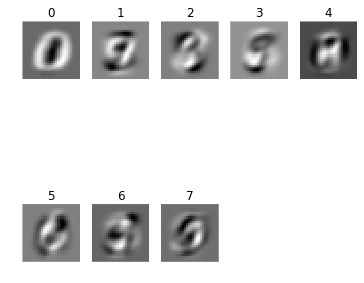

In [9]:
# visualize each component
def visualize_images(imgvecs):
    fig = plt.figure(figsize=(6, 6))
    
    # display grid shape
    numrows = int(np.sqrt(len(imgvecs)))
    numcols = int(len(imgvecs)/numrows)+1
    
    imgsize = int(np.sqrt(imgvecs.shape[1]))
    
    for i in range(len(imgvecs)):
        c = imgvecs[i]
        ax = fig.add_subplot(numrows,numcols,i+1)    
        ax.axis('off')
        ax.set_title(str(i))
        ax.imshow(c.reshape(imgsize, imgsize), 
                  interpolation='none', cmap = plt.get_cmap('gray'))
    plt.show()
    
def feat_reduce(data, numdims):
    dimreduce = PCA(n_components=numdims)
    reduced = dimreduce.fit_transform(data)  
    eigenvectors = dimreduce.components_
    print 'Visualizing the eigenvectors'
    visualize_images(eigenvectors)
    return reduced, eigenvectors
    
reducedTrainX8, _ = feat_reduce(trainX, 8)

### Faces

A more interesting example is PCA on images of faces. The code below loads a dataset of human faces and computes the principal components.

Loaded 400 faces of 4096 pixels each
Visualizing a few faces


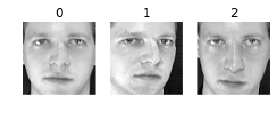

In [10]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().data
num_faces, num_dims = faces.shape
print 'Loaded', num_faces, 'faces of', num_dims, 'pixels each'
imgsize = np.sqrt(num_dims)

# show two of the faces, as an example
# note that these will be centered so the mean on each pixel is 0
print 'Visualizing a few faces'
visualize_images(faces[0:3, :])

faces_mean = faces.mean(axis=0)
faces -= faces_mean  # center the data, as required for PCA

Run PCA on this dataset just as we did for the digits...

Visualizing the eigenvectors


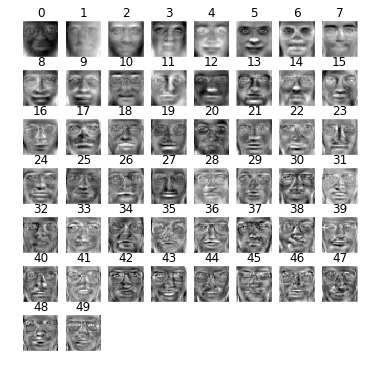

In [60]:
reducedFaces, face_eigenvectors = feat_reduce(faces, 50)

An interpretation of these eigenvectors is that every face in the original data is a **linear combination of the eigenvectors above**. We'll call these eigenvectors "eigenfaces".

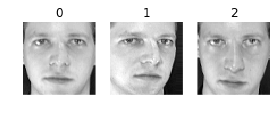

First face: [-6.43 -0.7  -1.43  1.28  2.56 -0.95  2.08 -2.94 -0.37  0.24 -1.35  1.17
  0.39  0.36  0.75  0.27  0.51 -0.6  -0.16 -0.28  0.14  0.74 -0.12  0.42
  0.5  -0.51  0.71 -0.15 -0.03  0.6  -0.5   0.34 -0.09  0.82  0.09 -0.2
 -0.3  -0.57 -0.46  0.44  0.27  0.16 -0.08  0.63  0.3   0.25  0.27 -0.17
  0.29  0.86]
Second face: [ -1.08e+00  -6.70e+00   1.84e+00   5.08e+00   7.31e-01  -1.76e+00
  -1.58e+00  -2.10e+00  -1.07e+00   2.06e+00  -5.03e-02  -1.11e+00
   1.52e+00  -3.64e-01  -9.31e-01   1.00e+00   7.33e-01   6.46e-01
   5.87e-02   2.21e+00  -1.97e-01   1.12e+00  -7.56e-01   2.28e-01
  -6.40e-01   7.20e-01   4.19e-01  -1.82e-01  -5.43e-01   5.02e-01
   5.70e-01  -2.67e-01   2.92e-01   3.86e-01   1.92e-01   2.51e-01
  -9.22e-02  -2.62e-03  -1.52e-01  -2.68e-01  -3.17e-02  -7.16e-02
  -1.01e+00  -1.86e-01   7.21e-01   3.97e-01   2.47e-01   3.75e-01
  -3.17e-01  -6.21e-02]


In [61]:
visualize_images(faces[0:3, :]+faces_mean)
np.set_printoptions(precision=2)
print 'First face:', reducedFaces[0]
print 'Second face:', reducedFaces[1]

That is, the first face is -6.43 times the 1st eigenface plus -0.7 times the 2nd eigenface plus -1.43 times the 3rd eigenface plus 1.28 times the 4th eigenface, etc.

In other words, each eigenface is a fundamental building block. We can say that *every face* is built by adding or subtracting some amount of each eigenface!

**Exercise 5:** Why did we add `faces_mean` before visualizing the first three vectors in `faces`? Hint: image pixel values range from 0 to 255. What are the ranges of the values in the centered images?

**Exercise 6:** With the premise that each eigenface is a building block, what facial features would you say the displayed eigenfaces are primarily representing?

Now let's visualize how the faces look when re-constructed (with the reduced dimensional faces projected onto the transpose of the eigenvectors).

Showing original and reconstructed faces


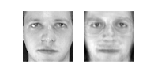

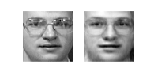

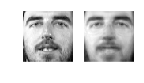

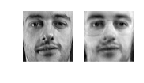

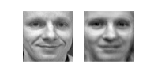

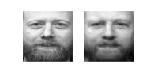

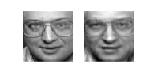

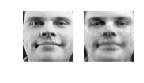

In [62]:
print 'Showing original and reconstructed faces'

for i in range(0, reducedFaces.shape[0], 50):  
    # show original image
    fig = plt.figure(figsize=(2, 2))
    ax = fig.add_subplot(1,2,1)  
    ax.axis('off')
    ax.imshow((faces[i]+faces_mean).reshape(64, 64), 
               cmap = plt.get_cmap('gray'), 
               interpolation='none')
    # multiply by eigenvectors' transpose to invert projection
    reconstructed = reducedFaces[i].dot(face_eigenvectors)
    ax = fig.add_subplot(1,2,2)  
    ax.axis('off')
    ax.imshow((reconstructed+faces_mean).reshape(64, 64),
               cmap = plt.get_cmap('gray'), 
               interpolation='none')
    plt.show()

**Exercise 7:** What is the dimensionality of `reducedFaces[i]`, `face_eigenvectors`, and the resulting dot product of the two?

**Exercise 8:** Change the number of principal components in the call `feat_reduce` and re-run the above few cells. What is the minimum number of components needed to get good reconstructions of the faces (where "good" is your subjective assessment)? At what point does adding more components stop being of much benefit?

## 4. Implementing PCA 

We don't need `sklearn` to compute the principal components of data. However, we do need an off-the-shelf algorithm, `numpy.linalg.eigh` (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html) to compute eigenvectors, since we're not learning how to do that in this class.

**Exercise 9:** Follow the steps to implement PCA. 

Paste your code into the 

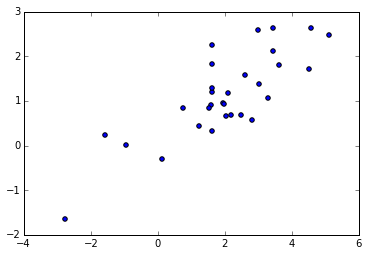

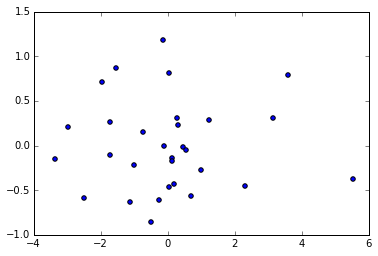

Principal Components (aka eigenvectors)
[-0.71 -0.71]
[ 0.71 -0.71]


In [65]:
from numpy.linalg import eigh

def pca(X):
    """Compute all the principal components of the vectors in the rows of X,
    and project X onto these dimensions.
    Return a tuple where the first item is an array of the principal components,
    and the second item is the projected data"""
    # 0. center the data so all the features have mean 0
    mean = X.mean(axis=1)
    X = X - mean[:, np.newaxis]
    
    # 1. Compute X^T . X
    bloop = np.dot(np.transpose(X), X)
    
    # 2. Compute the eigenvectors and eigenvalues of the above product
    # numpy.linalg.eigh returns a tuple where the first value is a list 
    # of eigenvectors and the second is are
    eigenValues, eigenVectors = eigh(bloop)
    
    # 3. sort the eigenvector rows in decreasing order of eigenvalue
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    # 4. project X onto the eigenvector columns
    projected = np.dot(X, eigenVectors)
    
    # 5. return a tuple of the eigenvectors (in order) and the projected data
    return (eigenVectors, projected)
    
# trying with the 2-d data from section 0:

# plot the original data
plt.scatter(toydata[:, 0], toydata[:, 1])
plt.show()

eigenvectors_toy, reduced_toydata = pca(toydata)
plt.scatter(reducted_toydata[:, 0], reducted_toydata[:, 1])
plt.show()

# display the eigenvectors
print 'Principal Components (aka eigenvectors)'
for c in eigenvectors_toy:
    print c
    
# check that your plot and eigenvectors are the same
# as the results from section 0 at the beginning